# Multilateral Development Institution Data

## Loading Data and Overview

In [70]:
foo <- read.csv("https://tinyurl.com/yb4phxx8") # read in the data

In [71]:
# column names
names(foo)

[1] "Number"                  "Status"                 
 [3] "Cluster"                 "Prefix"                 
 [5] "Type"                    "Country"                
 [7] "Dept"                    "Division"               
 [9] "LTAA"                    "Loan"                   
[11] "ApprovalDate"            "AgreementDate"          
[13] "Agreement"               "EffectivityDate"        
[15] "CancellationDate"        "FinancialCompletionDate"
[17] "OriginalCompletionDate"  "RevisedCompletionDate"  
[19] "JSF"                     "Fund"                   
[21] "RevisedAmount"           "Rating"                 
[23] "No"                      "PCR"                    
[25] "CirculationDate"

In [72]:
# dimensions of the data set
dim(foo)

[1] 9016   25

In [73]:
# quick look at the data structure
head(foo)

Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,⋯,FinancialCompletionDate,OriginalCompletionDate,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate
5001,Financially Completed,,R,RETA,REG,,,"Agriculture, natural resources and rural development",0,⋯,1987-12-31,,1987-12-31,NA,2,0.155,NA,,,
1,Financially Completed,,,ADTA,INO,,,"Agriculture, natural resources and rural development",0,⋯,1968-07-31,,1968-07-31,NA,2,0.080,NA,,,
2,Financially Completed,,,ADTA,KOR,,,"Agriculture, natural resources and rural development",0,⋯,1969-10-31,,1969-10-31,NA,2,0.067,NA,,,
3,Financially Completed,,,ADTA,PHI,,,"Agriculture, natural resources and rural development",0,⋯,1970-01-31,,1970-01-31,NA,2,0.105,NA,,,
4,Financially Completed,,,ADTA,VIE,,,Finance,0,⋯,1972-08-31,,1972-08-31,NA,2,0.115,NA,,,
5,Financially Completed,,,PPTA,PHI,,,Transport,0,⋯,1970-03-31,,1970-03-31,NA,2,0.325,NA,,,


In [74]:
# one thing to be very careful with (in this data set) is the use of dates. 8 columns involve dates.

# take note of the columns representing calendar dates
date.columns <- c(11, 12, 14, 15, 16, 17, 18, 25)

In [75]:
# these columns need some tweaking--I want to address missing values, calling the blank (empty) 
# elements "NA" instead of leaving them blank, and I wish to tell R these are "Date" objects.

for(i in date.columns)  # this "for loop" only loops through the "date.columns" -- no other columns.

  {
  
  # identify which values are missing in the "i"th column of the foo data set
  which_values_are_missing <- which(as.character(foo[, i]) == "")
  
  # those values that are missing (blank) in the "i"th column are replaced by <NA>
  # because R knows how to handle "NA" -- NA means something special in R--blanks are handled 
  # more unpredictably (which is bad).
  foo[which_values_are_missing, i] <- NA
  
  # last step--replace each of these columns (which is structured as a column of "factor" values)
  # as a column of dates--i.e., convert them to an object of "class" = Date. They are dates, after all.
  # And if you convert them to the Date class, R will know they are dates and you can manipulate 
  # dates in a simple, straightforward way. Otherwise, you won't be able to easily manipulate them
  # arithmetically.  E.g., for simple Date operations, see lines 48-58 below...
  # **By the way, if you don't understand what a "factor" is in R, you should Google it.** 
  foo[, i] <- as.Date(as.character(foo[, i]))

  }

# Now R knows that these columns are comprised of dates
# for example...  Replicate this yourself...

# foo[3,12]
# [1] "1968-03-13"

# foo[4,12]
# [1] "1968-07-03"

# foo[3,12] - foo[4,12]
# Time difference of -112 days

# Also, one additional helpful hint... How to eliminate rows with NAs...
# The "is.na" function--for more info, Google it or type ?is.na at the R command prompt in the console.
which.have.NAs <- which(is.na(foo$Rating == TRUE)) # for which rows is the claim "is.na" a TRUE claim?

# Then, if you wanted to, e.g., remove all those rows, retaining only the rows with ratings...
new_foo <- foo[-which.have.NAs, ]
# Notice I called this tweaked data set "new_foo" instead of rewriting over the original data set...
# It's a bit safer to do this, in case I decide I want to quickly revert back to the original data set.


# ASSIGNMENT 1 -- You may want to read ALL the questions before you begin. 
NOTE: FOR ALL QUESTIONS BELOW, ONLY CONSIDER PROJECTS WITH non-missing "Circulation.Date" >= 2008-01-01.   
EXCLUDE ALL OTHER PROJECTS FROM YOUR ANALYSIS.    
YOU MUST provide a link to your R code. ------ DON'T FORGET TO DO THIS!!!!!!!!!!!!    
Take note of the column names: i.e., you can type: names(foo)     
fyi: the column called "Rating" is the success rating at completion. 0 = lowest, 3 = highest.    

In [76]:
# remove all projects without circulation date
foo.has.Circ.Date <- foo[!is.na(foo$CirculationDate),]

# remove all projects w circ date before 2008-01-01
my_foo <- foo.has.Circ.Date[foo.has.Circ.Date$CirculationDate >= '2008-01-01',]

head(my_foo)
dim(my_foo)

,Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,⋯,FinancialCompletionDate,OriginalCompletionDate,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate
2529,2001,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,⋯,1998-08-31,NA,1996-06-30,NA,2,0.21,2,,13-08,2008-01-17
2530,2002,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,⋯,1998-05-31,NA,1995-11-30,NA,2,0.24,2,,13-08,2008-01-17
2531,2003,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,⋯,1998-04-30,NA,1995-11-30,NA,2,0.35,2,,13-08,2008-01-17
2754,5600,Financially Completed,,R,RETA,REG,PPFD,COCS,Public sector management,0,⋯,2004-10-29,2003-12-31,2003-12-31,NA,2,0.12,2,20-10,,2010-01-15
2904,5624,Financially Completed,,R,RETA,REG,PPFD,COPP,Public sector management,0,⋯,2002-04-30,NA,1997-12-31,NA,2,0.60,3,471-09,,2009-12-29
3059,2440,Financially Completed,,,ADTA,MLD,SFSP-AUS,SAOC**,Public sector management,0,⋯,2003-04-30,NA,1998-06-30,NA,2,0.40,2,309-09,,2009-10-30


[1] 1874   25

# Question 1

When projects are approved, they are approved for a certain period of time (until the time of "original completion date"). While projects are active, this "original" completion date is often pushed out (extended), and then there is a "revised" completion date.

You have been told that project duration at approval is generally about 2 years (24 months). In other words, (purportedly) when projects are approved, the difference between the original project completion date and the the approval date is (supposedly) approximately 24 months. 

#### (a) Is this claim true? Explain. 
(Remember, for this ENTIRE assignment, only consider projects with Circulation.Date >= 2008-01-01. This will be your only reminder...)

Has project duration at approval changed over time (consider projects circulated earlier and circulated later). Be sure to discuss mean durations, median durations, and the interquartile range of durations (using the "quantile" function). 

Approximate suggested length: 3-5 sentences

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.60   13.30   19.73   21.46   26.10  112.30      21 

Warning message:
“Removed 21 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 21 rows containing missing values (geom_point).”

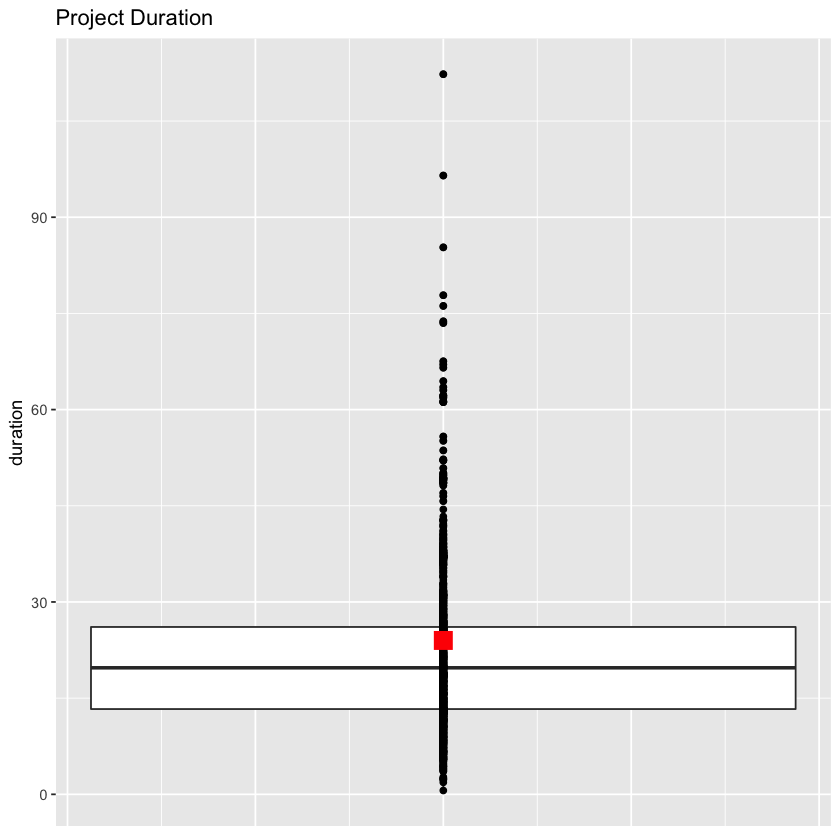

In [77]:
# duration time in months
my_foo$duration <- as.numeric((my_foo$OriginalCompletionDate - my_foo$ApprovalDate)/30)

# 5 point summary
summary(my_foo$duration)
library(ggplot2)
ggplot(my_foo, aes(x=1,y=duration)) + geom_boxplot() + geom_point() + annotate("point", x = 1, y = 24, size=5, shape = 15, colour = "red") + theme(axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank())+ggtitle("Project Duration") 

#+ annotate("text", label = "min = 0.60", x = 1.3, y = 100)+ annotate("text", label = "Q1 = 13.30", x = 1.3, y = 95) + annotate("text", label = "Med = 19.70", x = 1.3, y = 90)+ annotate("text", label = "Mean = 21.5", x = 1.3, y = 85)+ annotate("text", label = "Q3 = 26.10", x = 1.3, y = 80)+ annotate("text", label = "Max = 112.3", x = 1.3, y = 75)








The average project duration is approximately 21.46 months, slightly below the supposed duration of 2 years. Looking at the boxplot above, we can see that the project duration actually has a rather high range (from 0.6 months to 111.7 months) but a relatively tight interquartile range (from 13.3 months to 26.10 months).

Warning message:
“Removed 21 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 21 rows containing missing values (geom_point).”

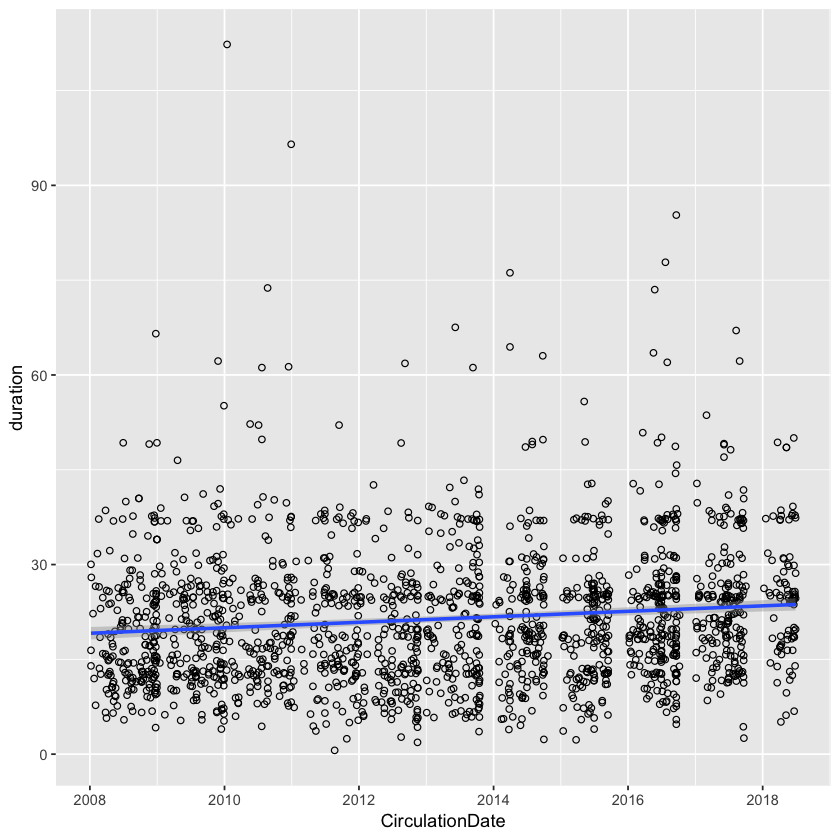

In [78]:
# change over time, based on Circulation Date
ggplot(my_foo, aes(x=CirculationDate, y=duration)) +
    geom_point(shape=1) +
    geom_smooth(method=lm)

In [79]:
# split data by year
foo_08_to_10 <- my_foo[my_foo$CirculationDate < "2010-01-01",]
foo_10_to_12 <- my_foo[my_foo$CirculationDate >= "2010-01-01" & my_foo$CirculationDate < "2012-01-01",]
foo_12_to_14 <- my_foo[my_foo$CirculationDate >= "2012-01-01" & my_foo$CirculationDate < "2014-01-01",]
foo_14_to_16 <- my_foo[my_foo$CirculationDate >= "2014-01-01" & my_foo$CirculationDate < "2016-01-01",]
foo_16_to_inf <- my_foo[my_foo$CirculationDate >= "2016-01-01", ]

# exclude NA
foo_08_to_10.has.Dur <- foo_08_to_10[!is.na(foo_08_to_10$duration),]
foo_10_to_12.has.Dur <- foo_10_to_12[!is.na(foo_10_to_12$duration),]
foo_12_to_14.has.Dur <- foo_12_to_14[!is.na(foo_12_to_14$duration),]
foo_14_to_16.has.Dur <- foo_14_to_16[!is.na(foo_14_to_16$duration),]
foo_16_to_inf.has.Dur <- foo_16_to_inf[!is.na(foo_16_to_inf$duration),]

# print number of exclusions
print('Data points excluded due to NA')
print(paste0("     from '08 to '10:  ", nrow(foo_08_to_10) - nrow(foo_08_to_10.has.Dur)," "))
print(paste0("     from '10 to '12:  ", nrow(foo_10_to_12) - nrow(foo_10_to_12.has.Dur),"  "))
print(paste0("     from '12 to '14:  ", nrow(foo_12_to_14) - nrow(foo_12_to_14.has.Dur),"  "))
print(paste0("     from '14 to '16:  ", nrow(foo_14_to_16) - nrow(foo_14_to_16.has.Dur),"  "))
print(paste0("     from '08 to inf:  ", nrow(foo_16_to_inf) - nrow(foo_16_to_inf.has.Dur),"  "))

[1] "Data points excluded due to NA"
[1] "     from '08 to '10:  19 "
[1] "     from '10 to '12:  2  "
[1] "     from '12 to '14:  0  "
[1] "     from '14 to '16:  0  "
[1] "     from '08 to inf:  0  "


In [80]:
duration_over_years <- list()
duration_over_years[[1]] <- c(foo_08_to_10.has.Dur$duration)
duration_over_years[[2]] <- c(foo_10_to_12.has.Dur$duration)
duration_over_years[[3]] <- c(foo_12_to_14.has.Dur$duration)
duration_over_years[[4]] <- c(foo_14_to_16.has.Dur$duration)
duration_over_years[[5]] <- c(foo_16_to_inf.has.Dur$duration)

meanDur_over_years <- unlist(lapply(duration_over_years,mean))
medDur_over_years <- unlist(lapply(duration_over_years,median))
iqrDur_over_years <- unlist(lapply(duration_over_years,IQR))

# create data frame of summary vals by year
years <- c("'08-'10","'10-'12","'12-'14","'14-'16'","'16-inf")
summ_duration <- data.frame(years)
summ_duration$mean <- meanDur_over_years
summ_duration$median <- medDur_over_years
summ_duration$IQR <- iqrDur_over_years

head(summ_duration)

years,mean,median,IQR
'08-'10,20.03621,18.48333,13.02500
'10-'12,21.25578,18.41667,12.50833
'12-'14,19.96728,18.76667,12.96667
'14-'16',21.12036,19.66667,12.53333
'16-inf,23.85481,23.00000,11.46667


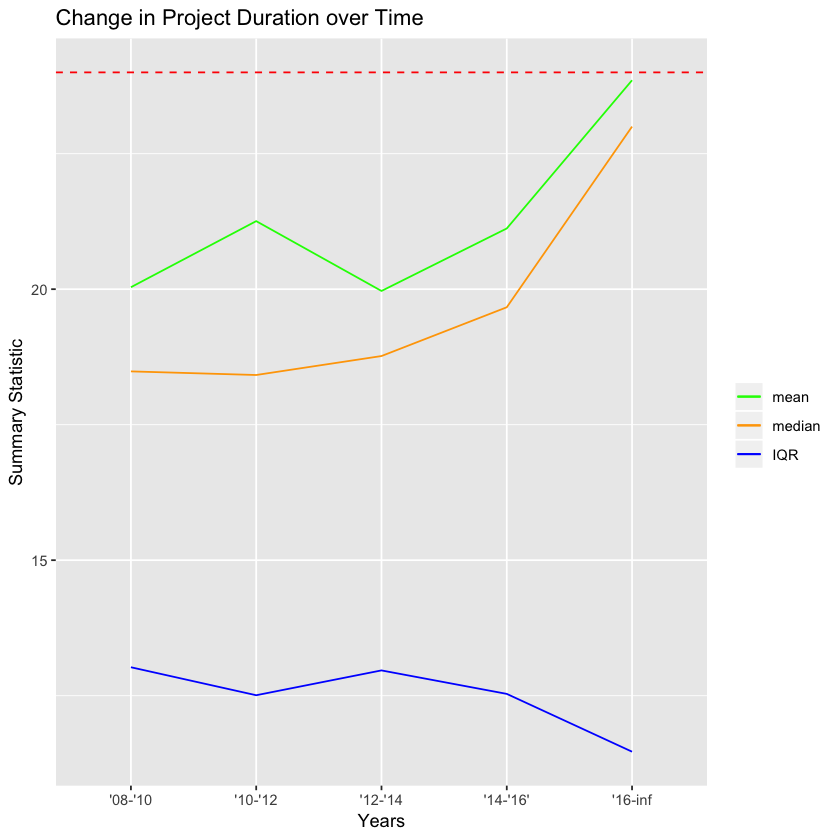

In [81]:
ggplot(data = summ_duration, aes(x = years,group=1)) +
  geom_line(aes(y = mean, colour = "mean")) +
  geom_line(aes(y = median, colour = "median")) +
  geom_line(aes(y = IQR, colour = "IQR")) + 
    geom_hline(aes(yintercept= 24), colour= 'red',linetype="dashed") +
  scale_colour_manual("", 
                      breaks = c("mean", "median", "IQR"),
                      values = c("mean"="green", "median"="orange", 
                                 "IQR"="blue")) +
  xlab("Years") +
  scale_y_continuous("Summary Statistic") + 
  labs(title="Change in Project Duration over Time")

Both the mean and median of project durations have been increasing over time, indicating that later projects have are being approved for a longer duration. Additionally, the IQR has been decreasing over time, indicating that the vairance of the project duration approval has been decreasing. Overall, this shows that project durations are both increasing and becoming more consistent. The mean is consistently slightly higher than the median, showing that there is a slight left skew in project durations that have stayed consistent over time.

#### (b) How does original planned project duration differ from actual duration 
(if actual duration is measured as the duration between "ApprovalDate" and "RevisedCompletionDate"?)  Once again, use means, medians, and interquartile ranges to explain your results. 

Approximate suggested length: 3-5 sentences

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   8.167  16.167  19.118  25.400 127.900      21 

Warning message:
“Removed 21 rows containing non-finite values (stat_boxplot).”

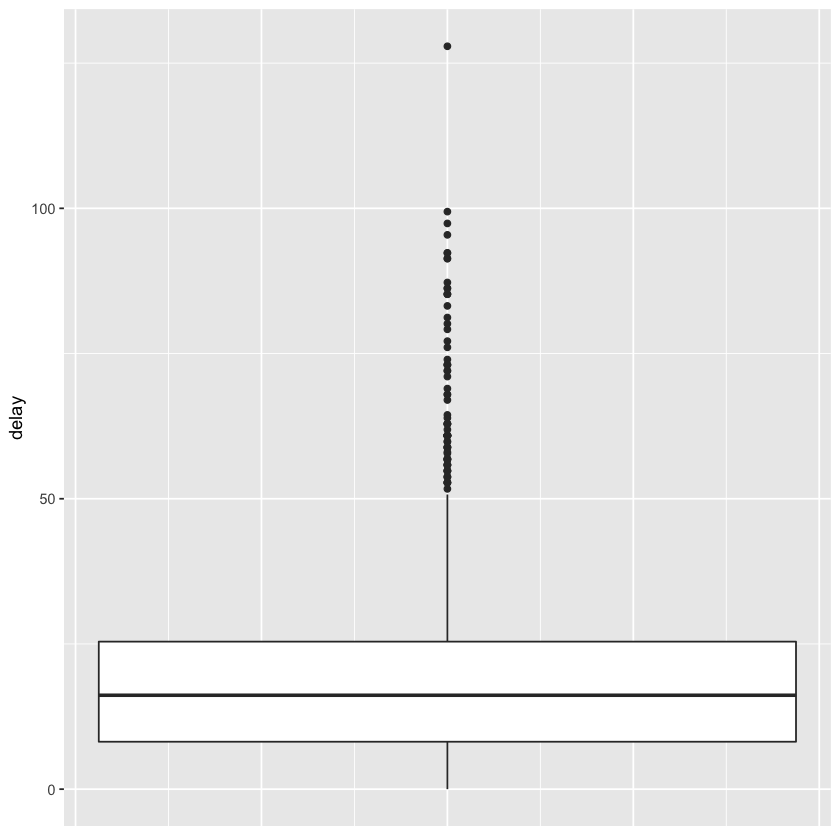

In [82]:
#overall delay

my_foo$delay <- as.numeric((my_foo$RevisedCompletionDate - my_foo$OriginalCompletionDate)/30)
summary(my_foo$delay)
ggplot(my_foo, aes(x=1,y=delay)) + 
  geom_boxplot() + theme(axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank())

Warning message:
“Removed 21 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 21 rows containing missing values (geom_point).”

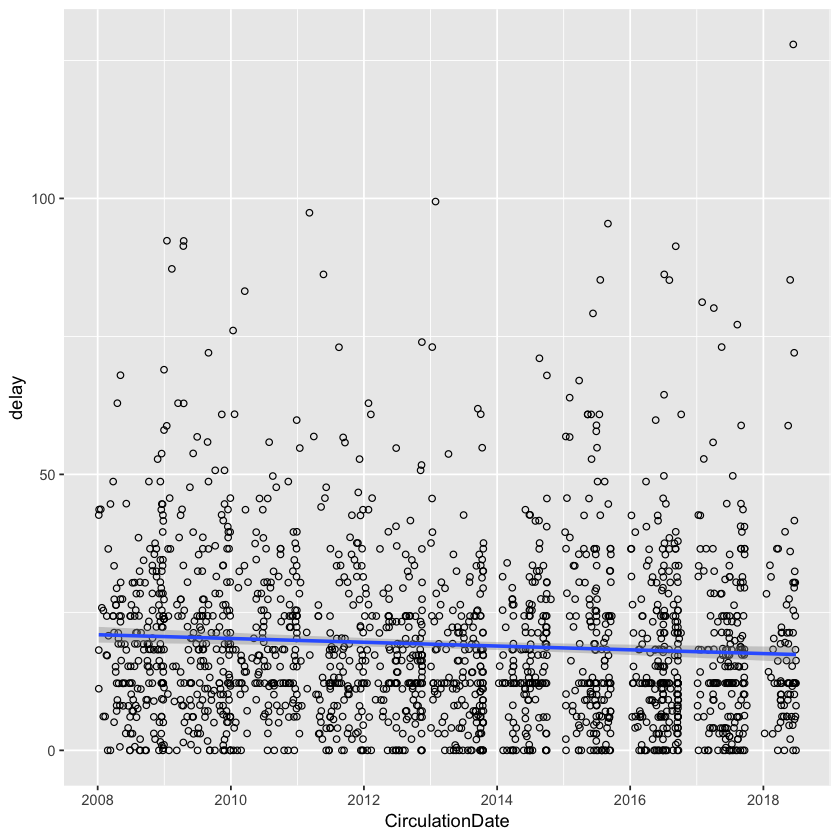

In [83]:
# general change over time

ggplot(my_foo, aes(x=CirculationDate, y=delay)) +
    geom_point(shape=1) +
    geom_smooth(method=lm)

There are many high outliers in delay, meaning that the delay of a project is fairly consistently between 8.16 and 25.4 months with a few outlier projects with long delays (max 129 months). There has been a general decrease in delay over time.

In [84]:
# summary stats change over time
foo_08_to_10$delay <- as.numeric(foo_08_to_10$RevisedCompletionDate - foo_08_to_10$OriginalCompletionDate)
foo_10_to_12$delay <- as.numeric(foo_10_to_12$RevisedCompletionDate - foo_10_to_12$OriginalCompletionDate)
foo_12_to_14$delay <- as.numeric(foo_12_to_14$RevisedCompletionDate - foo_12_to_14$OriginalCompletionDate)
foo_14_to_16$delay <- as.numeric(foo_14_to_16$RevisedCompletionDate - foo_14_to_16$OriginalCompletionDate)
foo_16_to_inf$delay <- as.numeric(foo_16_to_inf$RevisedCompletionDate - foo_16_to_inf$OriginalCompletionDate)

# exclude NA
foo_08_to_10.has.Delay <- foo_08_to_10[!is.na(foo_08_to_10$delay),]
foo_10_to_12.has.Delay <- foo_10_to_12[!is.na(foo_10_to_12$delay),]
foo_12_to_14.has.Delay <- foo_12_to_14[!is.na(foo_12_to_14$delay),]
foo_14_to_16.has.Delay <- foo_14_to_16[!is.na(foo_14_to_16$delay),]
foo_16_to_inf.has.Delay <- foo_16_to_inf[!is.na(foo_16_to_inf$delay),]

# print number of exclusions
print('Data points excluded due to NA')
print(paste0("     from '08 to '10:  ", nrow(foo_08_to_10) - nrow(foo_08_to_10.has.Delay)," "))
print(paste0("     from '10 to '12:  ", nrow(foo_10_to_12) - nrow(foo_10_to_12.has.Delay),"  "))
print(paste0("     from '12 to '14:  ", nrow(foo_12_to_14) - nrow(foo_12_to_14.has.Delay),"  "))
print(paste0("     from '14 to '16:  ", nrow(foo_14_to_16) - nrow(foo_14_to_16.has.Delay),"  "))
print(paste0("     from '08 to inf:  ", nrow(foo_16_to_inf) - nrow(foo_16_to_inf.has.Delay),"  "))

# create df of summ stats for delay
delay_over_years <- list()
delay_over_years[[1]] <- c(foo_08_to_10.has.Delay$delay)
delay_over_years[[2]] <- c(foo_10_to_12.has.Delay$delay)
delay_over_years[[3]] <- c(foo_12_to_14.has.Delay$delay)
delay_over_years[[4]] <- c(foo_14_to_16.has.Delay$delay)
delay_over_years[[5]] <- c(foo_16_to_inf.has.Delay$delay)

meanDelay_over_years <- unlist(lapply(delay_over_years,mean))
medDelay_over_years <- unlist(lapply(delay_over_years,median))
iqrDelay_over_years <- unlist(lapply(delay_over_years,IQR))

years <- c("'08-'10","'10-'12","'12-'14","'14-'16'","'16-inf")
summ_delay <- data.frame(years)
summ_delay$mean <- meanDelay_over_years
summ_delay$median <- medDelay_over_years
summ_delay$IQR <- iqrDelay_over_years
head(summ_delay)

[1] "Data points excluded due to NA"
[1] "     from '08 to '10:  19 "
[1] "     from '10 to '12:  2  "
[1] "     from '12 to '14:  0  "
[1] "     from '14 to '16:  0  "
[1] "     from '08 to inf:  0  "


years,mean,median,IQR
'08-'10,633.3401,563.5,577.0
'10-'12,608.7245,495.0,548.0
'12-'14,520.4373,456.0,471.5
'14-'16',575.9058,457.0,546.0
'16-inf,539.4754,366.0,517.0


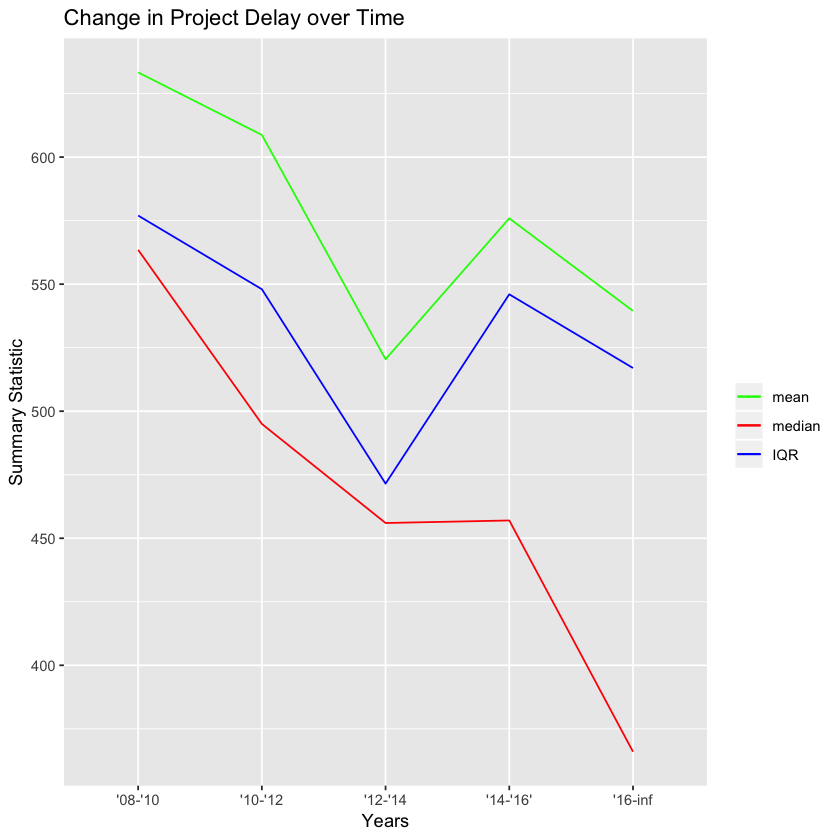

In [85]:
# plot summary stats of delay over years
ggplot(data = summ_delay, aes(x = years,group=1)) +
  geom_line(aes(y = mean, colour = "mean")) +
  geom_line(aes(y = median, colour = "median")) +
  geom_line(aes(y = IQR, colour = "IQR")) +
  scale_colour_manual("", 
                      breaks = c("mean", "median", "IQR"),
                      values = c("mean"="green", "median"="red", 
                                 "IQR"="blue")) +
  xlab("Years") +
  scale_y_continuous("Summary Statistic") + 
  labs(title="Change in Project Delay over Time")

Generally all statistics are decreasing, indicating a general decrease in delay over time. There has been a steady decrease in median over time (excluding '12 to '16 where it was relatively constant). However, the mean and IQR have much slower decreases, with a significant increase between '12 and '16. Additionally, the mean is higher than the median and the difference is increasing over time. Overall, this indicates that the general decrease in delay over time is mostly driven by a few projects in recent years with drastically lower delays.  However, the mean duration has not decreased as significantly. This indicates that there is a strong left skew in the distribution of project delays that has increased over time.

# Question 2

What % of projects that have ratings were rated 0?      
What % were rated 1? What % were rated 2? What % were rated 3?    

Answer these questions using a table or a figure. Provide a title AND an explanatory sentence or two that provides the numerical % results rounded to the nearest percentage-point.    

In [86]:
multi.fun <- function(x) {cbind(percentage = round(prop.table(table(x))*100,0),frequency = table(x))}
multi.fun(my_foo$Rating)



,percentage,frequency
0,3,50
1,16,297
2,68,1276
3,13,246


The large majority (68%) of projects are rated 2/3, a significant amount are rated 1 (16%) and 3 (13%). Very few projects are rated 0 (3%). Thus, it can likely be loosely inferred that the majority of projects are satisfactory with a slight left skew. 

# Question 3 

Repeat problem 2, but this time exclude all PPTA projects.    

PPTA projects are more prone to negative ratings, because after a certain point in time only the low-rated PPTA projects required ratings.  PPTA stands for "Project Preparatory Technical Assistance" and it is basically a project intended to set up a loan (often a very large multi-million-dollar loan). Only PPTAs that fail to "eventuate" to a loan are rated, which is why they are usually rated negatively.

In [87]:
multi.fun(my_foo[my_foo$Type!='PPTA',]$Rating)

,percentage,frequency
0,2,35
1,14,247
2,70,1234
3,14,241


Now a slightly larger majority (70%) of projects are rated 2/3, a significant amount are still rated 1 (14%) and 3 (134). Very few projects are rated 0 (2%). Thus, it can likely be loosely inferred that the majority of projects are satisfactory with a very slight left skew. Since the left skew is less significant, it can also be inferred that PPTA projects tend to drag the average ratings down.

# Question 4

Identify the top 25% of projects by "Revised.Amount" and the bottom 25% of projects by "RevisedAmount". ("RevisedAmount" shows the final project budget.)     


Compare the ratings of these projects. Can you draw a causal conclusion about the effect of budget size on ratings? Why or why not?     


Hint: Compare the characteristics of the two project groupings, e.g., "Dept", "Division", "Cluster", "Country"


Approximate suggested length: 3-5 sentences.

In [88]:
names(my_foo)

[1] "Number"                  "Status"                 
 [3] "Cluster"                 "Prefix"                 
 [5] "Type"                    "Country"                
 [7] "Dept"                    "Division"               
 [9] "LTAA"                    "Loan"                   
[11] "ApprovalDate"            "AgreementDate"          
[13] "Agreement"               "EffectivityDate"        
[15] "CancellationDate"        "FinancialCompletionDate"
[17] "OriginalCompletionDate"  "RevisedCompletionDate"  
[19] "JSF"                     "Fund"                   
[21] "RevisedAmount"           "Rating"                 
[23] "No"                      "PCR"                    
[25] "CirculationDate"         "duration"               
[27] "delay"

In [89]:
# make df w a column indicating high or low RA
high_low_RA <- my_foo[my_foo$RevisedAmount <= 0.4 | my_foo$RevisedAmount >= 1,]
#high_low_RA <- data.frame(lapply(my_foo, as.character), stringsAsFactors=FALSE)
high_low_RA$highLow <- ifelse(high_low_RA$RevisedAmount <= 0.4, "LOW", "HIGH")
head(high_low_RA)

,Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,⋯,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate,duration,delay,highLow
2529,2001,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,⋯,NA,2,0.21,2,,13-08,2008-01-17,NA,NA,LOW
2530,2002,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,⋯,NA,2,0.24,2,,13-08,2008-01-17,NA,NA,LOW
2531,2003,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,⋯,NA,2,0.35,2,,13-08,2008-01-17,NA,NA,LOW
2754,5600,Financially Completed,,R,RETA,REG,PPFD,COCS,Public sector management,0,⋯,NA,2,0.12,2,20-10,,2010-01-15,112.30000,0.00000,LOW
3059,2440,Financially Completed,,,ADTA,MLD,SFSP-AUS,SAOC**,Public sector management,0,⋯,NA,2,0.40,2,309-09,,2009-10-30,NA,NA,LOW
3722,5773,Financially Completed,,R,RETA,REG,OGC,OGC,Finance,0,⋯,NA,2,0.38,2,351-09,,2009-11-27,10.93333,50.73333,LOW


In [90]:
summary(high_low_RA[high_low_RA$highLow=="LOW",])

     Number                       Status       Cluster        Prefix   
 Min.   :2001   Active               :  0          :523          :205  
 1st Qu.:4975   Cancelled            :  0   C003   :  8   S      :139  
 Median :7518   Financially Completed:533   C006   :  1   RS     :121  
 Mean   :6916                               C009   :  1   R      : 58  
 3rd Qu.:8218                               14     :  0   CsS    :  5  
 Max.   :9087                               15     :  0   Cs     :  3  
                                            (Other):  0   (Other):  2  
      Type        Country         Dept        Division  
 CDTA   :154   REG    :181   SARD   : 96   PAHQ   : 17  
 ADTA   :151   PRC    : 78   SERD   : 95   SEPF   : 17  
 PATA   :106   IND    : 28   EARD   : 82   EAER   : 16  
 RETA   : 56   NEP    : 21   CWRD   : 54   EASS   : 16  
 RDTA   : 42   BAN    : 17   PARD   : 50   CWPF   : 15  
 PPTA   : 24   PAK    : 17   SDCC   : 49   EATC   : 15  
 (Other):  0   (Other):19

In [91]:
summary(high_low_RA[high_low_RA$highLow=="HIGH",])

     Number                       Status       Cluster        Prefix   
 Min.   :3128   Active               :  1          :525          :281  
 1st Qu.:6290   Cancelled            :  0   C003   :  6   R      :244  
 Median :7305   Financially Completed:542   C006   :  5   RCs    : 12  
 Mean   :6854                               C009   :  4   Cs     :  6  
 3rd Qu.:7870                               C002   :  2   CsS    :  0  
 Max.   :9024                               C011   :  1   RCsS   :  0  
                                            (Other):  0   (Other):  0  
      Type        Country         Dept        Division  
 CDTA   :155   REG    :256   SERD   :162   SEPF   : 34  
 ADTA   :123   IND    : 41   SDCC   : 89   SEER   : 26  
 RETA   :117   INO    : 28   SARD   : 73   SDSC   : 20  
 PATA   : 74   PRC    : 28   CWRD   : 67   SEEN   : 19  
 RDTA   : 37   PHI    : 25   EARD   : 47   INRM   : 18  
 PPTA   : 35   VIE    : 21   PARD   : 45   PAUS   : 15  
 (Other):  2   (Other):14

In [92]:
"
#_______I GIVE UP________________#
count = 1
for(i in high_low_RA){
    nam <- paste("p", count, sep = "")
    assign(nam, recordPlot(ggplot(high_low_RA, aes(x = highLow, y = i ,color=highLow)) + 
    geom_point(position = position_dodge(width = 0.4))))
    count <- count + 1
}

p3
"

ERROR: Error in parse(text = x, srcfile = src): <text>:5:19: unexpected symbol
4: for(i in high_low_RA){
5:     nam <- paste("p
                     ^


Warning message:
“position_dodge requires non-overlapping x intervals”Warning message:
“Removed 10 rows containing missing values (geom_point).”

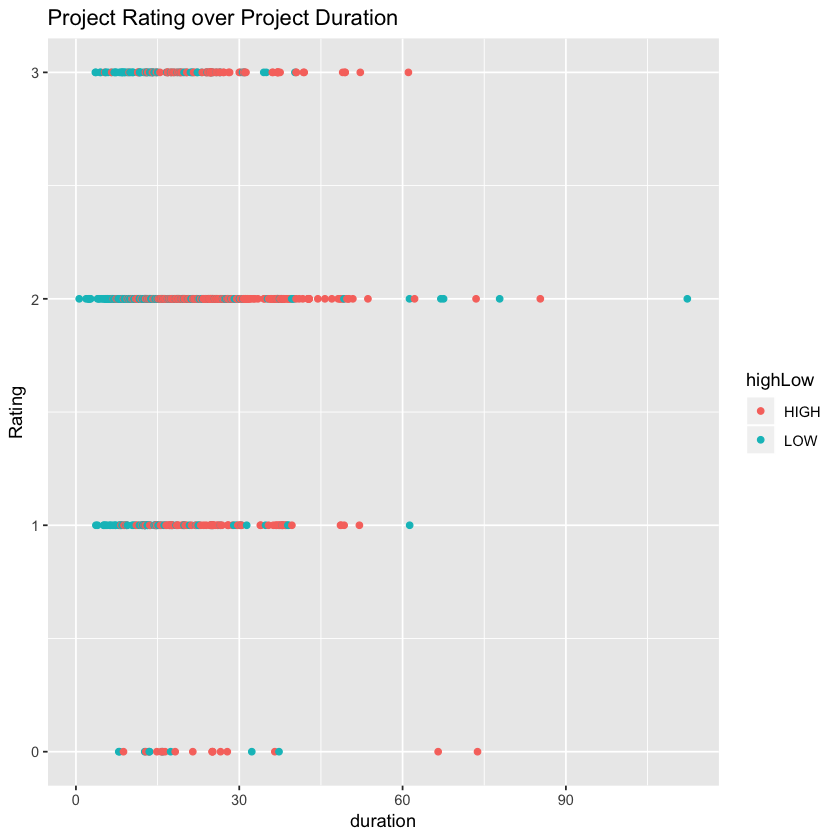

In [117]:
ggplot(high_low_RA, aes(x = duration, y = Rating,color=highLow)) + 
    geom_point(position = position_dodge(width = 0.4)) + ggtitle("Project Rating over Project Duration")

#'Number' 'Status' 'Cluster' 'Prefix' 'Type' 'Country' 'Dept' 'Division' 'LTAA' 'Loan' 'ApprovalDate' 'AgreementDate' 'Agreement' 'EffectivityDate' 'CancellationDate' 'FinancialCompletionDate' 'OriginalCompletionDate' 'RevisedCompletionDate' 'JSF' 'Fund' 'RevisedAmount' 'Rating' 'No' 'PCR' 'CirculationDate' 'duration' 'delay'

In [62]:
summary(high_low_RA[high_low_RA$highLow=="HIGH",])

     Number                       Status       Cluster        Prefix   
 Min.   :3128   Active               :  1          :525          :281  
 1st Qu.:6290   Cancelled            :  0   C003   :  6   R      :244  
 Median :7305   Financially Completed:542   C006   :  5   RCs    : 12  
 Mean   :6854                               C009   :  4   Cs     :  6  
 3rd Qu.:7870                               C002   :  2   CsS    :  0  
 Max.   :9024                               C011   :  1   RCsS   :  0  
                                            (Other):  0   (Other):  0  
      Type        Country         Dept        Division  
 CDTA   :155   REG    :256   SERD   :162   SEPF   : 34  
 ADTA   :123   IND    : 41   SDCC   : 89   SEER   : 26  
 RETA   :117   INO    : 28   SARD   : 73   SDSC   : 20  
 PATA   : 74   PRC    : 28   CWRD   : 67   SEEN   : 19  
 RDTA   : 37   PHI    : 25   EARD   : 47   INRM   : 18  
 PPTA   : 35   VIE    : 21   PARD   : 45   PAUS   : 15  
 (Other):  2   (Other):14

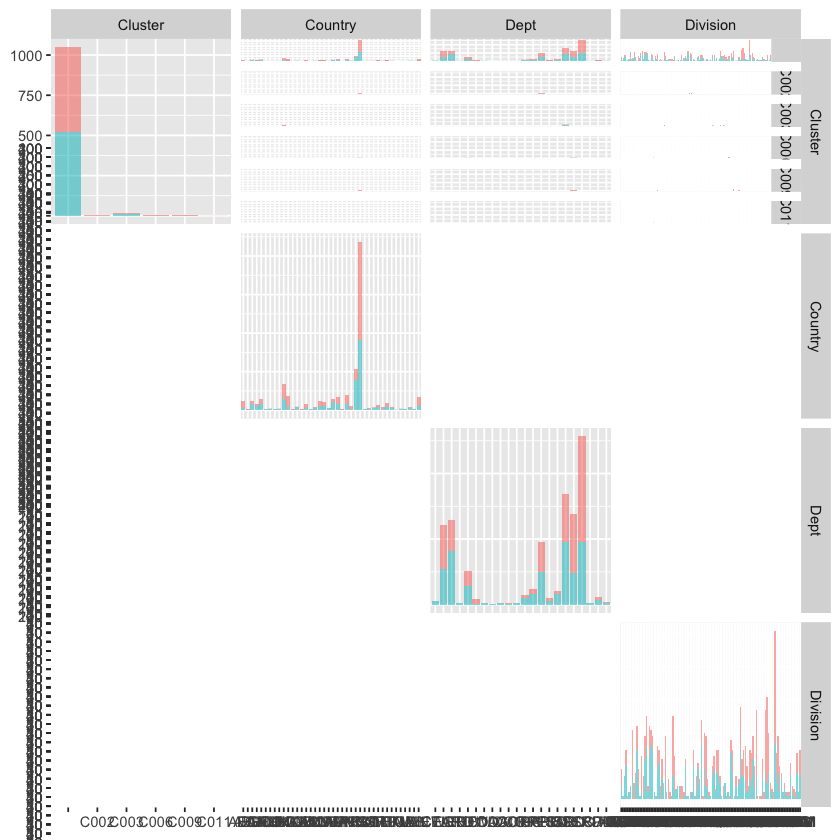

In [48]:
library(GGally)
ggpairs(high_low_RA[,(colnames(high_low_RA) %in% c("Cluster","Dept","Division","Country"))], aes(colour = high_low_RA$highLow, alpha = 0.4),cardinality_threshold=500)

No, because although there are differences in budget size between these two populations, there are also large discreptancy in the other column values. Thus, there are many confounding vNo, because there is a large discrepancy in the other column values.

For example,        
Projects with the following characteristics can be more frequently found in the bottom 25% of projects:        
	Country:  NEP, BAN, PAK       
	Dept: SARD, EARD       
	Division: PAHQ, EAER, CWPF, EATC       
	LTAA: Transport       
	Duration: Median 14; Mean 16       

Projects with the following characteristics can be more frequently found in the top 25% of projects:       
	Country:  VNM, PHI, INO       
	Dept: SERD, SDCC       
	Division: ISEER, SDSC, SEEN, NRM, PAUS       
	LTAA: Agriculture, Energy       
	Duration: Median 25; Mean 26       
    
Since budget amounts are not the only significant differences between these two groups, it cannot be assumed that it accounts for all of the difference in ratings.

# Question 5             
Imagine your manager asks you to apply Jeremy Howard's drivetrain model to the problem of optimal budget-setting to maximize project success (i.e., "Rating"). 


In such a situation, what would be the:        
(a) decision problem or objective?        
(b) lever or levers?        
(c) ideal RCT design?         
(d) dependent variable(s) and independent variable(s) in the modeler            
(e) And---Why would running RCTs and modeling/optimizing over RCT results be preferable to using (observational, non-RCT) "foo" data?



Approximate suggested length: 1-3 sentences for each sub-question.

(a) maximizing project success (rating)       

(b) Levers:
- Loan
- Type
- Country
- Dept 
- Division
- LTAA



(c) For projects over the next year, randomly allocate funds regardles of the project features. This randomization allows the generation of unbiased data, allowing us to truly analyze causal inference.         
          
(d) Dependent Variable: Rating; 
    Independent Variables: same as levers, namely    
- Loan
- Type
- Country
- Dept 
- Division
- LTAA
          
(e) Optimizing based on models created from randomized data eliminates bias, allowing us to more accurately model causal relationships. Within foo, there may be selection biases based on counfounded assignments of the independent variables, which introduces confounding variables into our data. Since we cannot observe counterfactual data, this means that we cannot know if there is selection bias which means we cannot establish what differences in the dependent variable is truly caused by the independent variable.          

Link to R code:
https://github.com/michlee1337/DataScience/blob/master/Multilateral%20Development%20Institution%20Data.ipynb
